<a href="https://colab.research.google.com/github/RokoSmoljic/dynamic/blob/master/SegmentacijaEhokardiograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Segmentacija Ehokardiograma
## Računska inteligencija - seminarski rad 



## Dataset 
---
Naziv: EchoNet-Dynamic

Dataset link: [https://echonet.github.io/dynamic/](https://echonet.github.io/dynamic/)

Sadržaj: 10,030 ehokardiograma snimljenih između 2016. i 2018. u sveučilišnoj bolnici sveučilišta Stanford. Snimke su rezolucije 112 x 112 piksela.




In [ ]:
#@title Default title text
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


In [ ]:
!ls '/content/drive/My Drive/EchoNet-Dynamic'

FileList.csv  Videos  VolumeTracings.csv


## Upute
### Import python modula
**All the cells in the notebook have the same access to all the variables you generated within a session. You have to import the libraries you use only once, and you don't have to import anything else. You can just run your cells linearly. The variables/functions/classes you use must just be defined before you use them, just like a regular python script.**
### Import python skripti kao modula tamo di triba
Najbolje koristi princip iz ovog [videa](https://www.youtube.com/watch?v=YP6APKLRf58) da ih ucitamo na luksicev google drive i importamo otud ko trenutno u kodu

In [ ]:
!cp -r '/content/drive/My Drive/dynamic' dynamic

In [ ]:

!pip install '/content/dynamic' 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./dynamic
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for echonet: filename=echonet-1.0.0-py3-none-any.whl size=21182 sha256=ef8df364a0a242a021c52cb579b46c08fb2a5e138db2b7c8c1667a11ce8c98d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-7qp3r_y3/wheels/ff/e9/32/ccda2a834131021715637595ea02fb68326ecdc53018cb41b6
Successfully built echonet


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import echonet
echonet

<module 'echonet' from '/usr/local/lib/python3.7/dist-packages/echonet/__init__.py'>

In [ ]:
!nvidia-smi

Mon Jun 20 10:22:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!zip -r ./output.zip ./output/

In [ ]:
!echonet segmentation --model_name="deeplabv3_resnet50" --num_epochs=200 --output="output/training_size/segmentation/256" --num_train_patients=256 --run_test --save_video --data_dir='/content/drive/My Drive/EchoNet-Dynamic'

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100% 16/16 [00:56<00:00,  3.56s/it]
Epoch #0
100% 12/12 [00:19<00:00,  1.66s/it, 0.5820 (0.2623) / 0.3128 0.1435, 0.0375, 0.0380]
100% 65/65 [01:21<00:00,  1.26s/it, 2231.1632 (2963.8004) / 0.3145 0.1385, 0.0000, 0.0000]
Epoch #1
100% 12/12 [00:17<00:00,  1.49s/it, 0.2719 (0.2637) / 0.3125 0.1425, 0.0000, 0.0000]
100% 65/65 [01:19<00:00,  1.22s/it, 5.5341 (4.0112) / 0.3145 0.1385, 0.0000, 0.0000]
Epoch #2
100% 12/12 [00:17<00:00,  1.45s/it, 0.2099 (0.1661) / 0.3126 0.1425, 0.0540, 0.0435]
100% 65/65 [01:21<00:00,  1.25s/it, 0.3834 (0.3948

In [ ]:
#@title Imports -> stavit sve importe ako nisu vec navedeni

import math
import os
import time
import collections
import pandas

import click
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import skimage.draw
import torch
import torchvision
import tqdm

Projekt je organiziran u obliku python package-a. Vrhovni modul ***echonet*** se sastoji od datoteka \_\_init__.py, \_\_main__.py, \_\_version__.py, config.py i submodula ***datasets*** i ***utils***. Submodul ***datasets*** sadrži datoteke \_\_init__.py i echo.py, a submodul ***utils*** \_\_init__.py, segmentation.py i video.py. Cijelu strukturu modula echonet je moguće prikazati na sljedeći način:<br>
<li>echonet</li>
<ul>
<li>__init__.py</li>
<li>__main__.py</li>
<li>__version__.py</li>
<li>config.py</li>
<li>datasets
<ul>
<li>__init__.py</li>
<li>echo.py</li>
</ul>
</li>
<li>utils
<ul>
<li>__init__.py</li>
<li>segmentation.py</li>
<li>video.py</li>
</ul>
</li>
</ul>
<br>
Datoteka __init__.py se koristi kako bi se naznačilo da se direktorij koristi kao python package. Poziva se pri importanju modula, a obično se koristi za inicijalizaciju package-a. Datoteka __main__.py predstavlja sučelje package-a prema komandnoj liniji, odnosno ta datoteka se automatski izvršava pri pozivu package-a kao skripte iz terminala, dok datoteka __version__.py daje informaciju o trenutnoj verziji.



## segmentation.py

Datoteka segmentation.py započinje importanjem potrebnih modula među kojima je zanimljiv modul ***click***. Ovaj modul omogućava kreiranje sučelja prema komandnoj liniji na brz i jednostavan način. Omogućava ugnježivanje naredbi, učitavanje podnaredbi tijekom izvođenja i automatsko generiranje *help* stranice. Naredba @click.command() definira ime naredbe kojom se skripta u terminalu poziva, @click.option() definira argumente koje je moguće proslijediti skripti prilikom pokretanja. Parametar *default* određuje vrijednost argumenta kada ona nije definirana pri pozivu, dok parametar *type* određuje tip vrijednosti koju taj argument prima.

In [ ]:
import math
import os
import time

import click
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import skimage.draw
import torch
import torchvision
import tqdm

import echonet


@click.command("segmentation")
@click.option("--data_dir", type=click.Path(exists=True, file_okay=False), default=None)
@click.option("--output", type=click.Path(file_okay=False), default=None)
@click.option("--model_name", type=click.Choice(
    sorted(name for name in torchvision.models.segmentation.__dict__
           if name.islower() and not name.startswith("__") and callable(torchvision.models.segmentation.__dict__[name]))),
    default="deeplabv3_resnet50")
@click.option("--pretrained/--random", default=False)
@click.option("--weights", type=click.Path(exists=True, dir_okay=False), default=None)
@click.option("--run_test/--skip_test", default=False)
@click.option("--save_video/--skip_video", default=False)
@click.option("--num_epochs", type=int, default=50)
@click.option("--lr", type=float, default=1e-5)
@click.option("--weight_decay", type=float, default=0)
@click.option("--lr_step_period", type=int, default=None)
@click.option("--num_train_patients", type=int, default=None)
@click.option("--num_workers", type=int, default=4)
@click.option("--batch_size", type=int, default=20)
@click.option("--device", type=str, default=None)
@click.option("--seed", type=int, default=0)

Metoda **run** obavlja ...
Ona prima argumente:
- **data_dir** koji prima putanju direktorija u kojem se nalazi dataset
-*output* kojom je definirana putanja direktorija u kojem će se spremiti izlazni podaci
- **model_name** definira model koji će se koristiti za segmentaciju
- **pretrained** određuje hoće li model koristiti pretrenirane težine
- **weights** predstavlja putanju do direktorija u kojem se nalaze inicijalizacijske težine modela
- **run_test** određuje hoćemo li nad modelom provesti test
- **save_video** hoćemo li spremiti segmentirani video
- **num_epochs** definira broj epoha koji će se izvršiti pri treniranju modela
- **lr** definira vrijednost parametra *Learning rate* u algoritmu učenja *Stochastic Gradient Descent*. Taj parametar određuje intenzitet kojim se mijenjaju težine modela u svakom koraku učenja
- **weight_decay** je dodatni parametar koji definira eksponencijalno opadanje promjena težina prema nuli
- **lr_step_period** predstavlja period u kojem dolazi do opadanja parametra *learning rate*, defaultne vrijednosti jednake beskonačnosti
- **num_workers** je broj podprocesa koji učitavaju podatke, *batch_size* broj uzoraka po *batchu*
- **device** definira uređaj na kojem se izvršava skripta.

In [ ]:
def run(
    data_dir=None,
    output=None,

    model_name="deeplabv3_resnet50",
    pretrained=False,
    weights=None,

    run_test=False,
    save_video=False,
    num_epochs=50,
    lr=1e-5,
    weight_decay=1e-5,
    lr_step_period=None,
    num_train_patients=None,
    num_workers=4,
    batch_size=20,
    device=None,
    seed=0,
):

Na samom početku metode *run* se resetiraju generatori slučajnih brojeva (postavljanje parametra *seed* na 0). Zatim se metodom *os.path.join()* vrši interakcija sa operacijskim sustavom i stvara jedinstvena izlazna putanja, a metodom *os.makedirs()* se rekurzivno stvara cijelo podstablo direktorija prema navedenoj putanji, Parametar *exist_ok* je postavljen na vrijednost True što označava da se neće prijaviti greška *FileExistsError* ukoliko željeno podstablo već postoji. Sljedećim linijama koda se učitava željeni model iz modula *torchvision* te se vrši postavljanje posljednjeg izlaznog sloja mreže na sloj dvodimenzionalne konvolucije sa jednim izlaznim kanalom. 

In [ ]:
 # Seed RNGs
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Set default output directory
    if output is None:
        output = os.path.join("output", "segmentation", "{}_{}".format(model_name, "pretrained" if pretrained else "random"))
    os.makedirs(output, exist_ok=True)

    # Set device for computations
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Set up model
    model = torchvision.models.segmentation.__dict__[model_name](pretrained=pretrained, aux_loss=False)

    model.classifier[-1] = torch.nn.Conv2d(model.classifier[-1].in_channels, 1, kernel_size=model.classifier[-1].kernel_size)  # change number of outputs to 1

Ukoliko je to definirano, provjerava li se da li je dostupno postaviti *device* na "cuda", ukoliko nije postavlja se na "cpu". Ako je "cuda", tada se prethodno definirani model paralelizira na najvišem levelu na način da se model dijele na *chunk-ove* dimenzije definirane batch_size-om i replicira na svaki dostupni uređaj gdje svaki dio modela prima odgovarajući dio ulaza. 

In [ ]:
if device.type == "cuda":
        model = torch.nn.DataParallel(model)
    model.to(device)

Program učitava prethodno spremljene težine modela, ukoliko su dostupne, postavlja parametre za optimiziranje treniranja te pomoću metode *get_mean_and_std* iz submodula *utils* računa statističke parametre (srednje grešku i standardnu devijaciju) podataka za treniranje.

In [ ]:
if weights is not None:
        checkpoint = torch.load(weights)
        model.load_state_dict(checkpoint['state_dict'])

    # Set up optimizer
    optim = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=weight_decay)
    if lr_step_period is None:
        lr_step_period = math.inf
    scheduler = torch.optim.lr_scheduler.StepLR(optim, lr_step_period)

    # Compute mean and std
    mean, std = echonet.utils.get_mean_and_std(echonet.datasets.Echo(root=data_dir, split="train"))

Objekt kwargs je *dictionary* u kojem se pohranjuju key-value parovi koji se prosljeđuju kao parametri metodi *echonet.datasets.Echo* koja vraća odgovarajući *dataset*. Ukoliko je definirani broj pacijenata manji od dužine dataset-a, tada se slučajnim izborom odabire odgovaraući broj uzoraka iz dataseta.

In [ ]:
 tasks = ["LargeFrame", "SmallFrame", "LargeTrace", "SmallTrace"]
    kwargs = {"target_type": tasks,
              "mean": mean,
              "std": std
              }

    # Set up datasets and dataloaders
    dataset = {}
    dataset["train"] = echonet.datasets.Echo(root=data_dir, split="train", **kwargs)
    if num_train_patients is not None and len(dataset["train"]) > num_train_patients:
        # Subsample patients (used for ablation experiment)
        indices = np.random.choice(len(dataset["train"]), num_train_patients, replace=False)
        dataset["train"] = torch.utils.data.Subset(dataset["train"], indices)
    dataset["val"] = echonet.datasets.Echo(root=data_dir, split="val", **kwargs)

Iz datoteke *checkpoint.pt*,koja se nalazi u izlaznom direktoriju, se učitavaju parametri modela. Isto tako učitavaju se parametri objekta optim koji na temelju sadašnjih parametara modela računa gradijente i nove vrijednosti parametara. Treba napomenuti da je ovim mehanizmom moguće pojedinačno pokretati epohe treniranja i slijedno ih nastavljati jednu na drugu, pri čemu se u *checkpoint["epoch"]* sprema redni broj prethodno obrađene epohe, a u *checkpoint["best_loss"]* najmanja vrijednost gubitka tokom validacije u bilo kojoj dosadašnjoj epohi. 

Ukoliko nije moguće učitati sadržaj datoteke *checkpoint.pt*, treniranje modela se pokreće od početne (prve) epohe

In [ ]:
with open(os.path.join(output, "log.csv"), "a") as f:
        epoch_resume = 0
        bestLoss = float("inf")
        try:
            # Attempt to load checkpoint
            checkpoint = torch.load(os.path.join(output, "checkpoint.pt"))
            model.load_state_dict(checkpoint['state_dict'])
            optim.load_state_dict(checkpoint['opt_dict'])
            scheduler.load_state_dict(checkpoint['scheduler_dict'])
            epoch_resume = checkpoint["epoch"] + 1
            bestLoss = checkpoint["best_loss"]
            f.write("Resuming from epoch {}\n".format(epoch_resume))
        except FileNotFoundError:
            f.write("Starting run from scratch\n")

Upotrebom for petlje se nastavlja izvršavanje postupka treniranja od trenutno dostignute epohe do krajnje definirane epohe. U svakoj iteraciji petlje se provodi treniranje i validacija modela. Početno odgovarajući dio dataset-a pošalje kao parametar konstruktoru objekta *dataloader* klase *torch.utils.data.DataLoader* čime se omogućuje jednostavan obilazak podataka, što je i detaljno objašnjeno u nastavku teksta. Objekt *dataloader* se kao parametar prosljeđuje metodi *run_epoch* . Na temelju njenih povratnih vrijednosti se računaju parametri ***large_dice***, ***small_dice***, ***overall_dice***.
Sasvim općenito, *Dice Coefficient* je parametar koji služi za metriku modela koji obavlja semantičku segmentaciju. Definira se kao postotak pikesela na slici koji su ispravno segmentirani. Promotrimo li primjer na donjoj slici, jasno je da se računa kao omjer dvostrukog broja preklapajućih piksela segmentirane slike i njene maske i ukupnog broja piksela na maski i segmentiranoj slici koji su obuhvaćeni unutar traženog oblika. U našem slučaju definiramo tri *Dice Coefficient-a*:


*   **overall_dice**: Definira se aritmetički prosjek *Dice Coefficient-a* za sve ehokardiograme u *dataset-u* i to za *frame-ove* na kojima je srce u  sistoli i za one na kojima je srce u dijastoli
*   **large_dice**: Definira se kao aritmetički prosjek *Dice Coefficient-a* za sve ehokardiograme i to za *frame-ove* na kojima je srce u dijastoli
*   **small_dice**: Definira se kao aritmetički prosjek *Dice Coefficient-a* za sve ehokardiograme i to za *frame-ove* na kojima je srce u sistoli



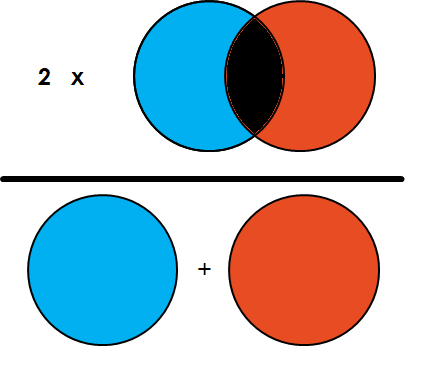

Nakon završetka izvršavanja metode *run_epoch* ispisujemo rezultate obrade u datoteku log.cvs u izlaznom direktoriju. Tu su prikazani razni parametri poput rednog broja epohe, maksimalne alocirane memorije, parametara overall_dice, small_dice, vremena izvršavanja itd...



In [ ]:
for epoch in range(epoch_resume, num_epochs):
            print("Epoch #{}".format(epoch), flush=True)
            for phase in ['train', 'val']:
                start_time = time.time()
                for i in range(torch.cuda.device_count()):
                    torch.cuda.reset_peak_memory_stats(i)

                ds = dataset[phase]
                dataloader = torch.utils.data.DataLoader(
                    ds, batch_size=batch_size, num_workers=num_workers, shuffle=True, pin_memory=(device.type == "cuda"), drop_last=(phase == "train"))

                loss, large_inter, large_union, small_inter, small_union = echonet.utils.segmentation.run_epoch(model, dataloader, phase == "train", optim, device)
                overall_dice = 2 * (large_inter.sum() + small_inter.sum()) / (large_union.sum() + large_inter.sum() + small_union.sum() + small_inter.sum())
                large_dice = 2 * large_inter.sum() / (large_union.sum() + large_inter.sum())
                small_dice = 2 * small_inter.sum() / (small_union.sum() + small_inter.sum())
                f.write("{},{},{},{},{},{},{},{},{},{},{}\n".format(epoch,
                                                                    phase,
                                                                    loss,
                                                                    overall_dice,
                                                                    large_dice,
                                                                    small_dice,
                                                                    time.time() - start_time,
                                                                    large_inter.size,
                                                                    sum(torch.cuda.max_memory_allocated() for i in range(torch.cuda.device_count())),
                                                                    sum(torch.cuda.max_memory_reserved() for i in range(torch.cuda.device_count())),
                                                                    batch_size))
                f.flush()
            scheduler.step()

U sljedećem koraku vrši se spremanje dosadašnjih rezultata obrade u objekt *save*, tipa dictionary, koji se sprema u izlazni direktorij pod nazivom "checkpoint.pt". Ukoliko je gubitak upravo obrađene epohe manji od najmanjeg dosadašnjeg zabilježenog gubitka, dictionary *save* se sprema u datoteku *best.pt*.

In [ ]:
 # Save checkpoint
            save = {
                'epoch': epoch,
                'state_dict': model.state_dict(),
                'best_loss': bestLoss,
                'loss': loss,
                'opt_dict': optim.state_dict(),
                'scheduler_dict': scheduler.state_dict(),
            }
            torch.save(save, os.path.join(output, "checkpoint.pt"))
            if loss < bestLoss:
                torch.save(save, os.path.join(output, "best.pt"))
                bestLoss = loss

Nakon obrade svih epoha model učitava parametre modela iz epohe sa najmanjim gubitkom.
Ukoliko je argument *run_test* zadan kao True, izvršava se testiranje modela. Metodom echonet.datasets.Echo se učitava dio dataseta predviđen za testiranje i validaciju. Ponovno se formira objekt dataloader koji omogućuje lakše rukovanje i prosljeđivanje podataka modelu, a zatim se metodom *run_epoch* pokreće testiranje i validacija. Provodi se proračun već objašnjenih parametara *overall_dice*, *small_dice*, *large_dice*. Razlika je što su to ovog puta jednodimenzinalne liste, duljine jednake broju uzoraka dataset-a. Dakle, za svaki uzorak dataset-a, odnosno svaki ehokardiogram se računaju zasebni parametri spremljeni kao pojedinačni element liste i potom spremaju u odgovarajuće datoteke *val_dice.csv*, odnosno *test_dice.csv*.

In [ ]:
if run_test:
            # Run on validation and test
            for split in ["val", "test"]:
                dataset = echonet.datasets.Echo(root=data_dir, split=split, **kwargs)
                dataloader = torch.utils.data.DataLoader(dataset,
                                                         batch_size=batch_size, num_workers=num_workers, shuffle=False, pin_memory=(device.type == "cuda"))
                loss, large_inter, large_union, small_inter, small_union = echonet.utils.segmentation.run_epoch(model, dataloader, False, None, device)

                overall_dice = 2 * (large_inter + small_inter) / (large_union + large_inter + small_union + small_inter)
                large_dice = 2 * large_inter / (large_union + large_inter)
                small_dice = 2 * small_inter / (small_union + small_inter)
                with open(os.path.join(output, "{}_dice.csv".format(split)), "w") as g:
                    g.write("Filename, Overall, Large, Small\n")
                    for (filename, overall, large, small) in zip(dataset.fnames, overall_dice, large_dice, small_dice):
                        g.write("{},{},{},{}\n".format(filename, overall, large, small))

                f.write("{} dice (overall): {:.4f} ({:.4f} - {:.4f})\n".format(split, *echonet.utils.bootstrap(np.concatenate((large_inter, small_inter)), np.concatenate((large_union, small_union)), echonet.utils.dice_similarity_coefficient)))
                f.write("{} dice (large):   {:.4f} ({:.4f} - {:.4f})\n".format(split, *echonet.utils.bootstrap(large_inter, large_union, echonet.utils.dice_similarity_coefficient)))
                f.write("{} dice (small):   {:.4f} ({:.4f} - {:.4f})\n".format(split, *echonet.utils.bootstrap(small_inter, small_union, echonet.utils.dice_similarity_coefficient)))
                f.flush()

U idućem koraku, ukoliko parametar *save_video* ima vrijednost True i ukoliko u izlaznom direktoriju u poddirektoriju *videos* ne postoje sve datoteke imena iz liste *dataloader.dataset.fnames*, odnosno svi videi iz testnog dijela *dataset-a*, pokreće se blok koda koji ima sljedeće funkcionalnosti.

Metoda *model.eval()* isključuje određene slojeve modela koji se ponašaju drugačije za vrijeme treniranja i evaluacije. To bi primjerice bili *DropOut* i *BatchNorm* slojevi.

Metodom *torch.no_grad()* se mijenja kontekst modela čime se isključuju algoritmi za gradijentne proračune. Ova metoda rezultira uštedom u potrošnji memorije prilikom proračuna.

Obilazimo sve uzorke (ehokardiograme) u testnom dataset-u i pomoću metode *tqdm.tqdm(dataloader)* pratimo napredak na *progress bar-u*. 

Pošto, bi segmentacija cijelog videa bila riskantna zbog potencijalne prevelike duljine videa, video se segmentira u manjim dijelovima, duljine (brojem *frameova*) određene parametrom *batch_size*. Takvi segmentirani odsječci se naposljetku konkataniraju u jedan cjelovit segmentirani video. 

U sljedećem koraku za svaki ehokardiogram imamo par originalnog videa koji je reprezentiran tenzorom *video* i izlaznog videa iz modela zadanog tenzorom *logit*. Nakon što denormalniziramo *video*, odnosno pomnožimo svaki piksel videa sa standardnom devijacijom, a zatim na tu vrijednost dodamo srednju grešku, konkateniramo dva identična tenzora videa jedan pored drugoga, odnosno po osi 3 (odgovara osi koja određuje širinu frame-ova videa). 'Lijeva' kopija videa će biti originalni video, dok će 'desna' kopija predstavljati segmentirani video. Segmentirani video se dobija na način da se za one piksela tenzora *logit* koji imaju vrijednost 1, u 'desnoj' kopiji tenzora *video* u plavom kanalu (kanal 0, pošto radimo sa BGR modelom) postavlja vrijednost 255, a za one piksele tenzora *logit* koji imaju vrijednost 0 se postavlja vrijednost 0.

In [ ]:
# Save videos with segmentation
    if save_video and not all(os.path.isfile(os.path.join(output, "videos", f)) for f in dataloader.dataset.fnames):
        # Only run if missing videos

        model.eval()

        os.makedirs(os.path.join(output, "videos"), exist_ok=True)
        os.makedirs(os.path.join(output, "size"), exist_ok=True)
        echonet.utils.latexify()

        with torch.no_grad():
            with open(os.path.join(output, "size.csv"), "w") as g:
                g.write("Filename,Frame,Size,HumanLarge,HumanSmall,ComputerSmall\n")
                for (x, (filenames, large_index, small_index), length) in tqdm.tqdm(dataloader):
                    # Run segmentation model on blocks of frames one-by-one
                    # The whole concatenated video may be too long to run together
                    y = np.concatenate([model(x[i:(i + batch_size), :, :, :].to(device))["out"].detach().cpu().numpy() for i in range(0, x.shape[0], batch_size)])

                    start = 0
                    x = x.numpy()
                    for (i, (filename, offset)) in enumerate(zip(filenames, length)):
                        # Extract one video and segmentation predictions
                        video = x[start:(start + offset), ...]
                        logit = y[start:(start + offset), 0, :, :]

                        # Un-normalize video
                        video *= std.reshape(1, 3, 1, 1)
                        video += mean.reshape(1, 3, 1, 1)

                        # Get frames, channels, height, and width
                        f, c, h, w = video.shape  # pylint: disable=W0612
                        assert c == 3

                        # Put two copies of the video side by side
                        video = np.concatenate((video, video), 3)

                        # If a pixel is in the segmentation, saturate blue channel
                        # Leave alone otherwise
                        video[:, 0, :, w:] = np.maximum(255. * (logit > 0), video[:, 0, :, w:])  # pylint: disable=E1111

U idućim koracimo računamo segmentirani broj piksela po svakom *frame-u*, odnosno segmentiranu površinu po *frame-u* i zapisujemo te vrijenosti u jednodimenzionalni tenzor *size*. Iz sortiranog tenzora nalazimo dvije vrijednosti *trim_min* i *trim_max*. One predstavljaju minimalnu, odnosno maksimalnu segmentiranu površinu, a dobijene su kao vrijednosti koje se nalaze na indeksu 0.05*len(size), odnosno indeksu 0.95*len(size) sortiranog tenzora size. Pomoću metode *scipy.signal.find_peaks* pronalazimo lokalne maksimume tenzora *size*. Pošto je unutar same metode proslijeđena invertirana (negirana) verzija tenzora size, tada lokalni maksimumi, u biti odgovaraju segmentiranoj površini *frame-ova* koji prikazuju srce u položaju sistole. Ova metoda zaista vraća istinite vrijednosti, pošto su njeni parametri *distance* i *prominence* postavljeni na 20 odnosno na polovicu razlike maksimalne i minimalne segmentirane površine. *Distance* definira minimalni razmak dva framea na kojem je detektirana sistola, a *prominence* definira relativnu granicu iznad koje se detektira lokalni maksimum.

In [ ]:
  # Compute size of segmentation per frame
                        size = (logit > 0).sum((1, 2))

                        # Identify systole frames with peak detection
                        trim_min = sorted(size)[round(len(size) ** 0.05)]
                        trim_max = sorted(size)[round(len(size) ** 0.95)]
                        trim_range = trim_max - trim_min
                        systole = set(scipy.signal.find_peaks(-size, distance=20, prominence=(0.50 * trim_range))[0])

                        # Write sizes and frames to file
                        for (frame, s) in enumerate(size):
                            g.write("{},{},{},{},{},{}\n".format(filename, frame, s, 1 if frame == large_index[i] else 0, 1 if frame == small_index[i] else 0, 1 if frame in systole else 0))


Sljedeći dijelovi koda služe za grafički prikazivanje rezultata segmentacije. Naime, prikazujemo vremensku ovisnost površine lijeve ventrikule uz korištenje modula *patplotlib.pyplot*. Prvo, iscrtavamo *scatter* graf koji se sastoji od vrijednosti iz tenzora *size*, a zatim uz pomoć metode *plot* iscrtavamo vertikalne ravne linije u vremenskim trenucima koji odgovaraju položaju sistole, odnosno minimalne površine lijeve ventrikule srca. Ovaj postupak je popraćen i dodatnim kodom koji se odnosi na uređivanje i labeliranje samog grafa.

In [ ]:
# Plot sizes
                        fig = plt.figure(figsize=(size.shape[0] / 50 * 1.5, 3))
                        plt.scatter(np.arange(size.shape[0]) / 50, size, s=1)
                        ylim = plt.ylim()
                        for s in systole:
                            plt.plot(np.array([s, s]) / 50, ylim, linewidth=1)
                        plt.ylim(ylim)
                        plt.title(os.path.splitext(filename)[0])
                        plt.xlabel("Seconds")
                        plt.ylabel("Size (pixels)")
                        plt.tight_layout()
                        plt.savefig(os.path.join(output, "size", os.path.splitext(filename)[0] + ".pdf"))
                        plt.close(fig)

Na samom početku se jednodimenzionalni tenzor *size* normalizira. Ukoliko se od vrijednosti svakog elementa tenzora oduzme minimalna vrijednost, a zatim podijeli sa maksimalnom vrijednosti takvog umanjenog tenzora, dobije se tenzor čije su vrijednosti unutar intervala [ 0 , 1 ]. 
U nastavku, iteriramo kroz elemente niza *size*, i na svakom *framae-u* videa bijelom bojom označavamo piksel videa koji je povezan sa  vrijednosti trenutnog elementa niza *size*, što rezultira tankom horizontalnom bijelom linijom. Sličan postupak se obavlja i ukoliko je trenutni element, jedan od frameova zabilježen u listi *systole*.

Metoda *dash* stvara listu indeksa prema sljedećem pravilu. Ukoliko *dash* ima sljedeći poziv:

*dash(10,30,on=2,off=5)* 

,tada je povratna vrijednost metode lista [10,11,17,18,24,25], odnosno listu *extenda* sa onoliko brojeva u nizu koliki je parametar on, krenuvši napočetku od broja *start*, zatim preskače *off* vrijednosti, ponovno dodaje *on* vrijednosti i tako u krug dok ne dostigne vrijednost definiranu parametrom *stop*.
Ova lista služi za indeksiranje piksela koji obojiti u zeleno, ukoliko je trenutni *frame* od strane vanjskih ekperata označen kao *frame* u kojem je srce u položaju dijastole. Isto tako pikseli indeksirani na temelju ove liste će se obojiti u crveno ukoliko je trenutni *frame* označen kao *frame* u kojem se srce nalazi u položaju sistole. Ovakvo označavanje će rezultirati nizom jednako udaljenih, paralelnih o relativno debelih vertikalnih linija.

Nadalje, iscrtavamo bijeli krug sa središtem određenim indeksom trenutnog *framea* i površinom lijeve ventrikule koja se nalazi na njemu, radiusa 4.1 incha.



In [ ]:
 # Normalize size to [0, 1]
                        size -= size.min()
                        size = size / size.max()
                        size = 1 - size

                        # Iterate the frames in this video
                        for (f, s) in enumerate(size):

                            # On all frames, mark a pixel for the size of the frame
                            video[:, :, int(round(115 + 100 * s)), int(round(f / len(size) * 200 + 10))] = 255.

                            if f in systole:
                                # If frame is computer-selected systole, mark with a line
                                video[:, :, 115:224, int(round(f / len(size) * 200 + 10))] = 255.

                            def dash(start, stop, on=10, off=10):
                                buf = []
                                x = start
                                while x < stop:
                                    buf.extend(range(x, x + on))
                                    x += on
                                    x += off
                                buf = np.array(buf)
                                buf = buf[buf < stop]
                                return buf
                            d = dash(115, 224)

                            if f == large_index[i]:
                                # If frame is human-selected diastole, mark with green dashed line on all frames
                                video[:, :, d, int(round(f / len(size) * 200 + 10))] = np.array([0, 225, 0]).reshape((1, 3, 1))
                            if f == small_index[i]:
                                # If frame is human-selected systole, mark with red dashed line on all frames
                                video[:, :, d, int(round(f / len(size) * 200 + 10))] = np.array([0, 0, 225]).reshape((1, 3, 1))

                            # Get pixels for a circle centered on the pixel
                            r, c = skimage.draw.disk((int(round(115 + 100 * s)), int(round(f / len(size) * 200 + 10))), 4.1)

                            # On the frame that's being shown, put a circle over the pixel
                            video[f, :, r, c] = 255.

Na samom kraju, segmenitrani video transponiramo. Posjetimo on je do ovog trenutka bio tenzor oblika [ f , c , h , w ], a nakon transponiranja ima oblik [ c , f , h , w ]. Takav video spremamo u poddirektorij *videos* izlaznog direktorija (sa ekstenzijom .avi).

In [ ]:
# Rearrange dimensions and save
                        video = video.transpose(1, 0, 2, 3)
                        video = video.astype(np.uint8)
                        echonet.utils.savevideo(os.path.join(output, "videos", filename), video, 50)

## utils/\_\_init\_\_.py

[link text](https://)### loadvideo()

Metoda za argument prima putanju/path do videa koji je potrebno učitati. Učitavanje se izvodi korištenjem cv2(OpenCV 2) modula. 

Prvo se putem `cv2.VideoCapture` metode definira video objekt iz kojeg se izvlače informacije o rezoluciji(width*height) i broju frame-ova videa. Podaci za video se zatim učitavaju frame-by-frame i to na način da se za svaki frame vrate R,G,B vrijednosti u obliku niza od 3 8-bitna integera/vrijednosti 0-255) za svaki njegov pixel.

Nakon učitavanja podataka za sve frame-ove videa rezultat je tenzor čiji je format [frame][X][Y] = [R,G,B] odnosno [frame, height, width,channels]. Za potrebe našeg računanja želimo [channels, frame, height, width] format što postižemo korištenjem **numpy** `transpose()` metode koja mijenja položaj osi tenzora.

In [ ]:
def loadvideo(filename: str) -> np.ndarray:

    if not os.path.exists(filename):
        raise FileNotFoundError(filename)
    # Kreiraj video objekt
    capture = cv2.VideoCapture(filename)

    frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    # Tensor [f,h,w,c] formata -> elementi tenzora su 3-člani nizovi 8-bitnih integera
    v = np.zeros((frame_count, frame_height, frame_width, 3), np.uint8)

    for count in range(frame_count):
        # Frame-by-frame čitanje
        ret, frame = capture.read()
        # Ret označava je li frame procitan ispravno
        # Frame je matrica s 3-članim nizovima kao elementima
        if not ret:
            raise ValueError("Failed to load frame #{} of {}.".format(count, filename))
        # Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed) -> pretvori u RGB format
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Za zadani frame postavi pročitane R,G,B vrijednosti za svaki piksel
        v[count, :, :] = frame
    # Transpose mehanizam -> 3. os trenutnog tenzora postaje prva os novog tenzora, prva os trenutnog tenzora postaje druga os novog tenzora itd.
    # Prije: [f,h,w,c]
    v = v.transpose((3, 0, 1, 2))
    # Nakon: [c,f,h,w]

    return v

### savevideo()

In [ ]:
def savevideo(filename: str, array: np.ndarray, fps: typing.Union[float, int] = 1):
    c, _, height, width = array.shape

    if c != 3:
        raise ValueError("savevideo expects array of shape (channels=3, frames, height, width), got shape ({})".format(", ".join(map(str, array.shape))))
    fourcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
    out = cv2.VideoWriter(filename, fourcc, fps, (width, height))

                                # f, w ,h , c redoslijed
    for frame in array.transpose((1, 2, 3, 0)):
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        out.write(frame)

### get_mean_and_std()


$$
( \frac{1}{n} \sum_{i=i}^{n} x_{i} ) \\
 \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2}
$$




In [ ]:
def get_mean_and_std(dataset: torch.utils.data.Dataset,
                     samples: int = 128,
                     batch_size: int = 8,
                     num_workers: int = 4):
    """Computes mean and std from samples from a Pytorch dataset.

    Args:
        dataset (torch.utils.data.Dataset): A Pytorch dataset.
            ``dataset[i][0]'' is expected to be the i-th video in the dataset, which
            should be a ``torch.Tensor'' of dimensions (channels=3, frames, height, width)
        samples (int or None, optional): Number of samples to take from dataset. If ``None'', mean and
            standard deviation are computed over all elements.
            Defaults to 128.
        batch_size (int, optional): how many samples per batch to load
            Defaults to 8.
        num_workers (int, optional): how many subprocesses to use for data
            loading. If 0, the data will be loaded in the main process.
            Defaults to 4.

    Returns:
       A tuple of the mean and standard deviation. Both are represented as np.array's of dimension (channels,).
    """

    if samples is not None and len(dataset) > samples:
        indices = np.random.choice(len(dataset), samples, replace=False)
        dataset = torch.utils.data.Subset(dataset, indices)
    dataloader = torch.utils.data.DataLoader(
        dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)

    n = 0  # number of elements taken (should be equal to samples by end of for loop)
    s1 = 0.  # sum of elements along channels (ends up as np.array of dimension (channels,))
    s2 = 0.  # sum of squares of elements along channels (ends up as np.array of dimension (channels,))
    for (x, *_) in tqdm.tqdm(dataloader):
        x = x.transpose(0, 1).contiguous().view(3, -1)
        n += x.shape[1]
        s1 += torch.sum(x, dim=1).numpy()
        s2 += torch.sum(x ** 2, dim=1).numpy()
    mean = s1 / n  # type: np.ndarray
    std = np.sqrt(s2 / n - mean ** 2)  # type: np.ndarray

    mean = mean.astype(np.float32)
    std = std.astype(np.float32)

    return mean, std

### bootstrap()

In [ ]:
def bootstrap(a, b, func, samples=10000):
    """Computes a bootstrapped confidence intervals for ``func(a, b)''.

    Args:
        a (array_like): first argument to `func`.
        b (array_like): second argument to `func`.
        func (callable): Function to compute confidence intervals for.
            ``dataset[i][0]'' is expected to be the i-th video in the dataset, which
            should be a ``torch.Tensor'' of dimensions (channels=3, frames, height, width)
        samples (int, optional): Number of samples to compute.
            Defaults to 10000.

    Returns:
       A tuple of (`func(a, b)`, estimated 5-th percentile, estimated 95-th percentile).
    """
    a = np.array(a)
    b = np.array(b)

    bootstraps = []
    for _ in range(samples):
        ind = np.random.choice(len(a), len(a))
        bootstraps.append(func(a[ind], b[ind]))
    bootstraps = sorted(bootstraps)

    return func(a, b), bootstraps[round(0.05 * len(bootstraps))], bootstraps[round(0.95 * len(bootstraps))]

### dice_similarity_coefficient()

In [ ]:
def dice_similarity_coefficient(inter, union):
    """Computes the dice similarity coefficient.

    Args:
        inter (iterable): iterable of the intersections
        union (iterable): iterable of the unions
    """
    return 2 * sum(inter) / (sum(union) + sum(inter))

## echo.py

Budući da želimo odvojiti način učitavanja i rukovanja s podacima od naše programske logike vezane uz segmentaciju zbog bolje modularnosti, čitljivosti i lakšeg održavanja kreiran je **echo.py** modul koji definira procedure koje će biti zajedničke svakoj instanci iz dataseta za treniranje, testiranje i validaciju. 

Zbog kompleksnosti domene računalnog vida, pisanje programskog koda za rukovanje s podacima "od nule" bilo bi iznimno zahtjevno i dugotrajno.

 Međutim, popularnost područja umjetne inteligencije i strojnog učenja u računalnom svijetu posljednih nekoliko desetljeća uz popratni eksponencijalni rast performansi hardeverskih tehnologija za posljedicu je imala razvoj različitih biblioteka i programskih okvira koji su znatno ubrzali i olakšali razvoj projekata u zadanim domenama.

 U prethodno navedene programske okvire spada i **PyTorch** koji je korišten u ovom projektu zajedno sa **TorchVision** bibliotekom integriranom unutar njega i specijaliziranom za područje računalnog vida.

 Kao i svaki programski okvir, **PyTorch** nam pruža različite funkcionalnosti kroz svoje sučelje s ciljem ponovnog korištenja logike koja je zajednička većini projekata u domeni strojnog učenja, ali uz paralelno smanjenje fleksibilnosti budući da moramo slijediti njegova "pravila".

 Upravo je takav princip korišten kod definiranja **dataloadera** za učitavanja dataseta i operacija nad samim instancama dataseta.

### PyTorch Dataloader
Osim definiranja načina učitavanja podataka za potrebe našeg modela, Dataloader služi kao i dodatna razina apstrakcije unutar PyTorch frameworka koja nam omogućava jednostavno iteriranje kroz učitane podatke. Svi parametri PyTorch Dataloader konstruktora navedeni su u [dokumentaciji](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader), a ovdje ćemo navesti one koji su korišteni u ovom projektu:
- **dataset**: najvažniji argument koji odgovara prethodno kreiranoj dataset instanci. Više detalja u **PyTorch Dataset** poglavlju.
- **batch_size**: jedan od najvažnijih hiperparametara modela koji može drastično utjecati na njegove performanse. Definira broj instanci dataset-a koje se obrađuju u jednoj iteraciji. U našem slučaju ovaj broj je 20 ili 10 ovisno o situaciji.
- **num_workers**: broj podprocesa koji će biti korišteni prilikom učitavanja podataka. Ovaj parametar omogućuje paralelizaciju učitavanja podataka. Detaljnije na [linku](https://pytorch.org/docs/stable/data.html#single-and-multi-process-data-loading).
- **shuffle**: definira hoće li se u svakoj epohi uzimati isti podaci po redu kako su navedeni(*false*) ili će se u svakoj epohi uzimati drukčiji podaci na random način(*true*). Ovaj parametar je dosta bitan ukoliko želimo izbjeći **overfitting** modela te ga pri tome postavljamo na *true*.
- **pin_memory**: definira hoće li podaci učitani podaci biti kopirani u posebni "pinned memeory" dio koji služi za prijenos podataka između CPU host i GPU device. Ovaj parametar može značajno utjecati na brzinu prijenosa podataka između host i device, ali naravno zahtjeva dodatne resurse kod host-a. Više informacija o ovom mehanizmu: [članak](https://leimao.github.io/blog/Page-Locked-Host-Memory-Data-Transfer/), [NVIDIA](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwirsMHB1LT4AhWC8rsIHRCuC5sQFnoECAcQAw&url=https%3A%2F%2Fengineering.purdue.edu%2F~smidkiff%2Fece563%2FNVidiaGPUTeachingToolkit%2FMod14DataXfer%2FMod14DataXfer.pdf&usg=AOvVaw3BIkpPbpyqs_hPKd0_-PBi)
- **drop_last**: definira sto će se dogoditi s posljednjim batchem ukoliko ukupan broj instanci dataset-a nije djeljiv s batch_size parametrom. *True* će odbaciti zadnji batch iz kalkulacija, dok će *false* uzeti zadnji batch koji će naravno biti manje veličine od batch_size parametra
- **collate_fn**: custom funkcija koja spaja instance unutar batch-a sa specificiranom veličinom u jedan tensor. Ukoliko ne specificiramo vlastitu metodu Dataloader će po defualtu spojiti instance dataset-a u formatu niza. `_video_collate_fn()` je primjer custom metode koju koristimo prilikom testiranja te je objašnjena u nastavku.

Instanca Dataloadera je iterator koji prolazi kroz sve podatke te u svakoj iteraciji vraća broj instanci dataset-a specificiran u batch_size parametru unutar jednog tenzora.

#### _video_collate_fn()

Uloga ove funkcije jest spajanje videa koji se nalaze u trenutnom batchu iteracije dataloadera. 

Svaka instanca dataset-a se dohvaća u formatu [channels, frame, height , width] specificiranom unutar **\_\_getitem()\_\_ metode. 

In [ ]:
def _video_collate_fn(x):
    """Collate function for Pytorch dataloader to merge multiple videos.

    This function should be used in a dataloader for a dataset that returns
    a video as the first element, along with some (non-zero) tuple of
    targets. Then, the input x is a list of tuples:
      - x[i][0] is the i-th video in the batch
      - x[i][1] are the targets for the i-th video

    This function returns a 3-tuple:
      - The first element is the videos concatenated along the frames
        dimension. This is done so that videos of different lengths can be
        processed together (tensors cannot be "jagged", so we cannot have
        a dimension for video, and another for frames).
      - The second element is contains the targets with no modification.
      - The third element is a list of the lengths of the videos in frames.
    """
    video, target = zip(*x)  # Extract the videos and targets

    # ``video'' is a tuple of length ``batch_size''
    #   Each element has shape (channels=3, frames, height, width)
    #   height and width are expected to be the same across videos, but
    #   frames can be different.

    # ``target'' is also a tuple of length ``batch_size''
    # Each element is a tuple of the targets for the item.

    i = list(map(lambda t: t.shape[1], video))  # Extract lengths of videos in frames

    # This contatenates the videos along the the frames dimension (basically
    # playing the videos one after another). The frames dimension is then
    # moved to be first.
    # Resulting shape is (total frames, channels=3, height, width)
    video = torch.as_tensor(np.swapaxes(np.concatenate(video, 1), 0, 1))#zamijeni prvu(channels) i drugu(frames) os tako da rezultat bude [frame, channel, h, w]

    # Swap dimensions (approximately a transpose)
    # Before: target[i][j] is the j-th target of element i
    # After:  target[i][j] is the i-th target of element j
    target = zip(*target)

    return video, target, i

### PyTorch Dataset
PyTorch podržava 2 različita tipa/formata datasetova koji se razlikuju po načinu pristupanja:
1. **map-style** datasets
2. **iterable-style** datasets

Za potrebe ovog projekta korišten je **map-style dataset** koji implementira **\_\_getitem\_\_**() i **\_\_len\_\_**() metode koje definiraju protokol pristupanja instancama sličan key-value pristupima unutar objekata ili hash mapa. 

Budući da je srž projekta segmentacija, kako bi imali dataset koji je kompatibilan s **Torchvision** metodama i modelom za segmentaciju potrebno je slijediti pravila programskog okvira koja nalažu da naš dataset moramo definirati kroz sučelje **torchvision.datasets.VisionDataset** klase. 

Ukoliko želimo koristiti vlastiti dataset(a ne neki javno dostupni i ugrađen u programski okvri) tada se procedura sastoji od nasljeđivanja **torchvision.datasets.VisionDataset** klase i definiranja vlastitog konstruktora(**\_\_init\_\_** metoda) te vlastitih **\_\_getitem\_\_**() i **\_\_len\_\_**() metoda.

Upravo je to sadržaj **echo.py** datoteke čije ćemo dijelove objasniti u nastavku.

### \_\_init\_\_()

Sukladno objektno-orijentiranoj paradigmi, funkcija konstruktora se automatski poziva prilikom kreiranja instance zadane klase(u našem slučaju je to instanca dataset-a). 

Prilikom kreiranja instance dataset-a u konstruktoru postavljamo određene parametre koji se tiču cjelokupnog dataset-a. Parametri se proslijeđuju kao argumenti konstruktora prilikom kreiranja instance te su navedeni u nastavku:
- root (string): Root direktorij u kojem se nalazi dataset (default `echonet.config.DATA_DIR`)
- split (string): Definira filter koji određuje koje instance dataset-a uzimamo u obzir ovisno o situaciji. To je ujedno i naziv stupca/labele u `FileList.csv` tablici koji omogućuje zadano filtriranje.  Moguće vrijendosti su:
  - `train`(koriste se prilikom treniranja modela)
  -  `val`(koriste se prilikom validacije modela)
  - `test`(koriste se prilikom testiranja modela)
  - `all`(uzmi sve podatke neovisno o labeli)
  - `external_test`(uzmi eksterne podatke koji se nalaze na lokaciji specificiranoj u `external_test_location`
- target_type (string or list, optional): parametar koji definira koje atribute od svih dostupnih ćemo uzeti u obzir za svaku instancu dataset-a. Svi mogući atributi su:
  - `Filename`: ime video datoteke
  - `EF(ejection-fraction)`: postotak volumena u odnosu na EDV koji srce potisne prilikom kontrakcije
  - `EDV(end-diastolic volume)`: volumen srca u trenutku dijastole, najveći volumen prilikom ciklusa
  - `ESV(end-systolic volume)`: volumen srca u trenutku sistole, najmanji volumen prilikom ciklusa
  - `LargeIndex`: indeks frame-a videa u kojem se događa EDV
  - `SmallIndex`: indeks frame-a videa u kojem se događa ESV
  - `LargeFrame`: matrica frame-a videa u kojem se događa EDV s normaliziranim vrijednostima u intervalu [0-1]
  - `SmallFrame`: matrica frame-a videa u kojem se događa ESV s normaliziranim vrijednostima u intervalu [0-1] 
  - `LargeTrace`: segmentacijska matrica `LargeFrame-a` u kojoj su pikseli koji su unutar lijeve komore/klijetke u EDV trenutku označeni s 1, a oni koji su izvan s 0
  - `SmallTrace`: segmentacijska matrica `SmallFrame-a` u kojoj su pikseli koji su unutar lijeve komore/klijetke u ESV trenutku označeni s 1, a oni koji su izvan s 0
- mean(int, float, or np.array shape=(3,), optional): aritmetička sredina za sve R,G,B kanale zajedno ili za svaki kanal odvojeno. Bitna kod normalizacije piksela videa.
-std (int, float, or np.array shape=(3,), optional): standardna devijacija za sve R,G,B kanale zajedno ili za svaki kanal odvojeno. Bitna kod normalizacije piksela videa.
- length (int or None, optional): ukupan točan broj frame-ova koje ćemo izvući iz videa. Ako je None uzimamo koliko je dopušteno s `max_length` parametrom.
- period (int, optional): definira frameove koje ćemo ekstrahirati iz videa. Npr, ukoliko je period=2 ekstrahirat će se frameovi 1, 3, 5, ...
- max_length (int or None, optional): definira maksimalni broj frame-ova koje ćemo uzeti iz videa. Ako je None nema ograničenja.
- clips (int, optional): broj mini-videa koje ćemo uzorkovati unutar glavnog videa koji poštuju `length`, `max_length` i `period` vrijednosti. Default 1.
- pad (int or None, optional): broj piksela koje je potrebno nadodati sa svake strane frame-a prilikom proširenja rezolucije. U tom slučaju u sredini će biti početni frame-ovi dok će rubovi biti obojani "srednjom" bojom frame-a(normalizirana vrijednost 0). 
- noise (float or None, optional): postotak piksela kod kojih ćemo dodati/uzrokovati šum radi poboljšanja robusnosti modela i smanjenja potencijalnog overfittinga.
- target_transform (callable, optional): metoda koja prima sliku i labele te ih transformira na način zadan u metodi.
- external_test_location (string): lokacija eksternih podatka za testiranje ukoliko je `split` postavljen na `external_test`

Također, sukladno objektno-orijentiranoj paradigmi prilikom nasljeđivanja parent klase potrebno je u child klasi pozvati konstruktor parent klase(u našem slučaju **torchvision.datasets.VisionDataset**). Klasi se proslijeđuju `root` i `target_transform` parametri sukladno specifikaciji **PyTorcha**.

Pristup instanci objekta klase za kojeg se poziva konsturktor u Pythonu je omogućen kroz **self** varijablu definiranu od strane Python okruženja i postavljene kao prvi parametar konstruktora.

Inicijalizacija parametara koji se tiču cijelog dataset-a zajedno s predefiniranim vrijednostima parametara konsturuktora i pozivom parent klase prikazan je u sljedećem isječku.

In [ ]:
    def __init__(self, root=None,
                 split="train", target_type="EF",
                 mean=0., std=1.,
                 length=16, period=2,
                 max_length=250,
                 clips=1,
                 pad=None,
                 noise=None,
                 target_transform=None,
                 external_test_location=None):
        if root is None:
            root = echonet.config.DATA_DIR

        super().__init__(root, target_transform=target_transform)

        self.split = split.upper()
        if not isinstance(target_type, list):
            target_type = [target_type]
        self.target_type = target_type
        self.mean = mean
        self.std = std
        self.length = length
        self.max_length = max_length
        self.period = period
        self.clips = clips
        self.pad = pad
        self.noise = noise
        self.target_transform = target_transform
        self.external_test_location = external_test_location

Nakon inicijalizacije svih parametara prvi korak je učitavanje podataka vezanih za instance dataset-a koje ćemo koristiti. Podaci su pohranjeni u 2 osnovne datoteke:
- FileList.csv
- VolumeTracings.csv

Prvo ćemo dohvatit podatke iz FileList.csv datoteke korištenjem `pandas.read_csv()` metode koja nam omogućuje manipulaciju sa .csv datotekama. `header` atribut će se postaviti na listu imena stupaca tablice, dok će `value` atribut biti niz koji će kao članove sadržavati vrijednosti redaka tablice za svaki video također u obliku niza. Također, moguće je specificiranjem imena stupca dobiti sve vrijednosti tog stupca korištenjem `x[ime_stupca]` sintakse.

`header` vrijednost ćemo spremiti u `self.header` varijablu, `value` u `self.outcome` te ćemo u `self.fnames` pohraniti imena svih datoteka koje sadrže videa.

In [ ]:
        self.fnames, self.outcome = [], []

        if self.split == "EXTERNAL_TEST":
            self.fnames = sorted(os.listdir(self.external_test_location))
        else:
            # Učitaj "FileList.csv" datoteku
            with open(os.path.join(self.root, "FileList.csv")) as f:
                data = pandas.read_csv(f)
            # Osiguraj da su sve vrijednosti "Split" stupca napisane velikim slovima
            data["Split"].map(lambda x: x.upper())

            if self.split != "ALL":
                # Uzmi samo one datoteke/videa koji imaju vrijednost "Split" atributa jednaku onoj proslijeđenoj u konstruktor
                data = data[data["Split"] == self.split]
                # U suprotnome uzmi sve datoteke/videa

            # Imena stupaca tablice
            self.header = data.columns.tolist()
            # Imena svih datoteka/videa tablice
            self.fnames = data["FileName"].tolist()
            # Ukoliko ime nema ekstenziju po defaultu postavi da je riječ o avi formatu
            self.fnames = [fn + ".avi" for fn in self.fnames if os.path.splitext(fn)[1] == ""]
            # Tenzor koji sadržava vrijednosti atributa tablice svih redaka
            self.outcome = data.values.tolist()

            # Broj redaka tablice(videa) mora biti jednak broju dostupnih videa odnosno svi videi koji se javljaju u tablici moraju biti dostupni
            # Kako provjeriti? 
            # Duljina self.fnames mora biti jednaka broju datoteka videa u direktoriju
            # Python -> razlika set()-ova jednaka je razlici broja elemenata set()-ova
            missing = set(self.fnames) - set(os.listdir(os.path.join(self.root, "Videos")))
            if len(missing) != 0:
                print("{} videos could not be found in {}:".format(len(missing), os.path.join(self.root, "Videos")))
                for f in sorted(missing):
                    print("\t", f)
                raise FileNotFoundError(os.path.join(self.root, "Videos", sorted(missing)[0]))

Time smo učitali sve podatke vezane uz Filelist.csv datoteku.

Značenja atributa tablice iz VolumeTracings.csv datoteke nisu intuitivna za razliku od onih iz Filelist.csv datoteke te su usko vezani uz problematiku koju pokušavamo rješiti u našem slučaju.

**[STAVI OVDE PRVU SLIKU FILE-A]**

Prisjetimo se, naš cilj je segmentirati lijevu komoru/klijetku srca na videozapisu. Kako bi naš model mogao "naučiti" razlikovati lijevu klijetku od ostatka srca mi ga moramo istrenirati na način da mu na velikom broju slika označimo gdje se nalazi lijeva klijetka. Upravo je to uloga VolumeTracings.csv datoteke.

Međutim, preostaje jedno važno pitanje: Kako računalu na efektivan način predstaviti gdje se na slici/frameu nalazi lijeva komora/klijetka?

Neki početni *bruteforce* odgovor bi bio da svakoj slici pridružimo bitmapu koja će s 1 označiti pixele koji predstavljaju lijevu komoru a s 0 ostale piksele. Lako je zaključiti da je ovakav pristup iznimno neefikasan kako memorijski tako i vremenski za labeliranje podataka.

U ovom projektu je stoga korištena kreativna ideja u vidu predstavljanja lijeve komore/klijetke dužinama kao što je prikazano na idućoj slici:

**[STAVI OVDE DRUGU SLIKU IZ ČLANKA]**

Svaka dužina definirana je s 2 točke od kojih svaka ima vlastitu x i y koordinatu unutar koordinatnog sustava slike. Ukoliko povežemo točke dužina ravnim linijama dobit ćemo poligon koji omeđuje lijevu komoru/klijetku srca te ćemo njenu poziciju na slici moći predočiti računalu. 

VolumeTracings.csv datoteka sadrži koordinate prve(X1,Y1) i druge(X2,Y2) točke dužina grupiranih po imenu videa definiranog u "FileName" stupcu i frame-u čiji je redni broj definiran u "Frame" stupcu. 

Način označavanja lijeve komore/klijetke na slici će biti detaljnjije obrađen kasnije. 

Podatke iz VolumeTracings.csv datoteke ćemo spremati u **self.frames** i **self.trace** atribute koji će biti **collections.defaultdict** Python [tipa](https://www.geeksforgeeks.org/defaultdict-in-python/) koji radi na key-value principu.

In [ ]:
self.frames = collections.defaultdict(list)
self.trace = collections.defaultdict(_defaultdict_of_lists)

def _defaultdict_of_lists():
    return collections.defaultdict(list)

Vidimo da će **self.frames** za value dio sadržavati listu, dok će **self.trace** za value dio sadržavati drugi dictionary koji će zatim za svoj value dio sadržavati listu.Ove razine indeksiranja bit će jasnije kada objasnimo značenje ovih atributa.

Uloga **self.frames** atributa je da za svaku datoteku/video za koji imamo podatak u VolumeTracings.csv datoteci zapišemo listu rednih brojeva frame-ova za koje su definirani podaci. Key će biti ime datoteke dok će value biti lista indeksa frame-ova.

Uloga **self.trace** atributa je da za svaku datoteku/video za koji imamo podatak u VolumeTracings.csv datoteci za svaki njegov frame zapišemo listu u kojoj će svaki član biti niz od 4 člana koji predstavljaju x1, y1, x2, y2 koordinate točaka dužine. Svi članovi liste za zadani frame predstavljaju potpuni prikaz/oznaku lijeve komore/klijetke srca na zadanom frame-u.

Programski kod za inicijalizaciju ovih atributa je sljedeći:



In [ ]:
             with open(os.path.join(self.root, "VolumeTracings.csv")) as f:
                header = f.readline().strip().split(",")
                assert header == ["FileName", "X1", "Y1", "X2", "Y2", "Frame"]
                for line in f:
                    # line = redak tablice, vrijednosti retka su odvojene zarezom pa ih parsiramo prema tom formatu
                    filename, x1, y1, x2, y2, frame = line.strip().split(',')
                    x1 = float(x1)
                    y1 = float(y1)
                    x2 = float(x2)
                    y2 = float(y2)
                    frame = int(frame)
                    if frame not in self.trace[filename]:
                        # Dodaj redni broj frame-a u za zadani file za kojeg imamo podatke
                        self.frames[filename].append(frame)
                    # Dodaj koordinate dužine za zadani file i zadani frame u formatu Python liste
                    self.trace[filename][frame].append((x1, y1, x2, y2))
            for filename in self.frames:
                for frame in self.frames[filename]:
                    #Pretvori iz tliste u NumPy niz
                    self.trace[filename][frame] = np.array(self.trace[filename][frame])

            # Zadrzi podatke samo za ona videa koji imaju podatke u VolumeTracings.csv datoteci
            # U slucaju da neki videi nemaju zadane tracing podatke
            keep = [len(self.frames[f]) >= 2 for f in self.fnames]
            self.fnames = [f for (f, k) in zip(self.fnames, keep) if k]
            self.outcome = [f for (f, k) in zip(self.outcome, keep) if k]

Time je završena obrada uloge i same implementacija **\_\_init\_\_()** konstruktora našeg dataset-a.

### **\_\_getitem()\_\_**





Kao što je prethodno rečeno, u našem projektu koristimo **map-style** dataset u kojem podacima pristupa preko key-value mehanizma. Prilikom učitavanja svake instance dataset-a **PyTorch** će pozvati ovu metodu za svaku instancu te joj automatski proslijediti `index` parametar u metodu koji označava index(redni broj-1) videa unutar direktorija iz kojeg se učitavaju podaci.

Prvi korak u metodi je učitavanje videa specificiranog zadanim indeksom. Budući da je redoslijed videa u direktoriju jednak redoslijedu redaka u FileList.csv datoteci možemo koristit **self.fnames** listu definiranu unutar konstruktora koja će nam za zadani `index` vratiti ime datoteke/videa koje nam je potrebno za njegovo učitavanje. Učitavanje videa ćemo raditi korištenjem `loadvideo()` utility funkcije.

Nakon poziva `loadvideo()` metode imamo tenzor koji sadrži podatke o R,G,B vrijednostima za svaki frame i svaki piksel na frame-u i to u [channel, frame, height, width] formatu.

In [ ]:
    def __getitem__(self, index):
        #index= INDEX videa u direktoriju odakle se dohvaćaju podaci
        # Find filename of video
        if self.split == "EXTERNAL_TEST":
            video = os.path.join(self.external_test_location, self.fnames[index])
        elif self.split == "CLINICAL_TEST":
            video = os.path.join(self.root, "ProcessedStrainStudyA4c", self.fnames[index])
        else:
            video = os.path.join(self.root, "Videos", self.fnames[index])

        # Load video into np.array
        #format c,f,h,w
        video = echonet.utils.loadvideo(video).astype(np.float32)

Idući korak je provjera potrebe za ubacivanjem šuma u učitane podatke ukoliko je to bilo definirano s **noise** parametrom konstruktora koji definira postotak piksela na kojima će biti kreiran šum.. 

Šum se sastoji u postavljanju crne boje odnosno vrijednosti 0 za R,G,B vrijednosti budući da vrijednosti boja još nisu normalizirane u ovom trenutku.

Budući da **noise** parametar predstavlja postotak piksela u videu kod kojih ćemo postaviti šum prvo moramo izračunati ukupan broj piksela videa koji se dobije prema formuli:


```
broj_pixela = broj_frameova * broj_redaka * broj_stupaca
```

Od ukupnog broja pixela u njih `self.noise * broj_pixela` će biti umetnut šum. Budući da je i ideja samog šuma u random smetnji tada ćemo na slučajan/random način izabrati `self.noise * broj_pixela` indeksa u rasponu od 0 do `broj_pixela`.

Nakon odabira indeksa budući da je naš video objekt u formatu [channel, frame, height, width] moramo se vratiti u njegovu indeksaciju odnosno iz odabranog indeksa dobiti informaciju o kojem je frame-u riječ i o kojim je x,y koordinatama piksela unutar frame-a riječ.



In [ ]:
          if self.noise is not None:
            # Ukupan broj pixela u cijelom videu
            n = video.shape[1] * video.shape[2] * video.shape[3]
            # Odaberi na random način indekse piksela u koje ćemo unijeti šum
            # Biramo self.noise * n indeksa u rasponu 0- n
            ind = np.random.choice(n, round(self.noise * n), replace=False)
            # Vrati se u [c,f,h,w] indeksaciju
            f = ind % video.shape[1]
            ind //= video.shape[1]
            i = ind % video.shape[2]
            ind //= video.shape[2]
            j = ind
            # Postavi R,G,B vrijednosti na 0 -> crna boja = šum
            video[:, f, i, j] = 0

Nakon opcionalnog ubacivanja šumova slijedi obvezna normalizacija R,G,B vrijednosti na raspon [0-1] i to korištenjem formule za jediničnu normalnu varijablu z:


```
z = (x - μ) / σ
```

Uočavamo da su za normalizaciju potrebne prethodno izračunate artmetička sredina i standardna devijacija izračunate posebno za svaki kanal i proslijeđene u konstruktor. Kako bi mogli dijeliti video tenzor [channel, frame, height, width] formata po svakom kanalu s odgovarajućom aritmetičkom sredinom i standardnom devijacijom za zadani kanal potrebno je pretvoriti aritmetičku sredinu i standardnu devijaciju u tenzore dimenzija [3, 1, 1 ,1]



In [ ]:
        if isinstance(self.mean, (float, int)):
            video -= self.mean
        else:
            video -= self.mean.reshape(3, 1, 1, 1)

        if isinstance(self.std, (float, int)):
            video /= self.std
        else:
            video /= self.std.reshape(3, 1, 1, 1)

Sljedeći korak je osiguravanje kriterija postavljenih s `length`, `max_length` i `period` parametrima konstruktora. 

Prisjetimo se da `length` definira točan broj frame-ova koje će sadržavati video(ukoliko je specificiran, u suprotnome uzimamo sve frame-ove koje možemo) dok `max_length` definira maksimalan broj frame-ova koje video može sadržavati. 

Broj frame-ova koje ćemo uzeti u razmatranje ovisi o `period` parametru koji definira period uzorkovanja frame-ova videa. Npr. ukoliko naš video ima 20 frame-ova a uzorkujemo svaki drugi frame tada će rezultantni video imati 20 / 2 = 10 frame-ova. 

Također, potrebno je osigurati da veličina krajnjeg rezultatnog videa bude manja od `max_length` vrijednosti, ali u isto vrijeme i barem jednaka `length` vrijednosti ukoliko je ona specificirana.

Ukoliko je veća od `max_length` uzimamo samo prvih `max_length` frame-ova.

Ukoliko je manja od `length` *paddamo* video na njegovom kraju na način da frame-ove koji nedostaju dodamo na kraj videa te njihove R,G,B vrijdnosti postavimo u 0.
> Napomena: za razliku od umetanja šuma u ovom trenutku R,G,B vrijednosti su normalizirane pa vrijendost 0 predstavlja vrijednost aritmeticke sredine izvornih R,G,B boja.

In [ ]:
        c, f, h, w = video.shape
        if self.length is None:
            # length označava broj frame-ova uzorkovanog videa
            length = f // self.period
        else:
            # Rezultantni video mora imati točno length frame-ova
            length = self.length

        if self.max_length is not None:
            # Uzmi prvih max_length frame-ova ako je length > max_length
            length = min(length, self.max_length)

        #Broj frameova rezultantog videa manji od broja frameova specificranog u length(za slučaj None uvijek prolazi)
        if f < length * self.period:
            # Paddamo video s frame-ovima pri kraju i to za onoliko frame-ova koliko nam nedostaje do željene duljine
            video = np.concatenate((video, np.zeros((c, length * self.period - f, h, w), video.dtype)), axis=1)
            c, f, h, w = video.shape  # pylint: disable=E0633

Sljedeći dio koda je vezan uz uzorkovanje i dijeljenje videa u manje dijelove tzv. clipove. Ova značajka može biti korisna za povećanje broja instanci na način da iz jednog videa dobijemo veći broj manjih videa i time umjetno povećamo broj videa na način da unutar jednog video objekta imamo više zasebnih clipova. Ovo može biti korisno prilikom testiranja modela jer tada izvodimo predikcije na odabranih tipovima podataka, a ovim postupkom povećavamo veličinu testnog seta.

Ukoliko je parametar postavljen na ključnu riječ "all" tada uzimamo sve moguće clipove unutar videa. Npr. svi mogući clipovi duljine 5 frame-ova unutar videa duljine 10 frame-ova bi bili [1,2,3,4,5], [2,3,4,5,6], ... Zaključujemo da se samo shiftamo za jedan frame udesno. Krajnja granica do koje se možemo shiftati je onaj frame nakon kojeg postoji još `length` frame-ova do kraja videa odnosno:


```
zadnji_indeks = broj_frameova - (length - 1) * period_uzorkovanja
```
što je upravo i definirano u kodu.

Ukoliko je **self.clips** postavljen na broj tada iz videa želimo izvući **self.clips** clipova duljine `length`. Logika uvjeta za zadnji indeks je ista samo što za razliku od "all" slučaja ne uzimamo sve indekse u rasponu od [0 - zadnji_indeks] već na random način u tom rasponu biramo **self.clips** početnih indeksa. Ukoliko je **self.cips** postavljen na 1 te uzorkujemo cijeli video(`length = None`) tada će rezultat biti cijeli video uzorkovan specificiranom sample frekvencijom.

Odabrane indekse početaka clipov spremamo u start niz.



In [ ]:
        if self.clips == "all":
            start = np.arange(f - (length - 1) * self.period)
        else:
            start = np.random.choice(f - (length - 1) * self.period, self.clips)

Prilikom definiranja argumenata konstruktora spomenuli smo `target_type` parametar koji definira atribute koje ćemo pridružiti svakoj instanci dataset-a/videu. Mogući atributi su prethodno navedeni prilikom definiranja parametara konstruktora, a u nastavku su prikazani načini njihove inicijalizacije:

- Filename: možemo ga lako dohvatiti iz **self.fnames** preko `indexa` koji se proslijeđuje **\_\_getitem\_\_** metodi
- LargeIndex: za svaki video imamo pohranjene indekse svih frame-ova koji imaju podatke u VolumeTracings.csv datoteci u **self.frames**. Budući da je riječ o dijastoli, podaci za dijastolu će u tablici uvijek biti posljednje navedeni pa uzimamo zadnji član **self.frames** niza za video određen `indexom`.
- SmallIndex: ista logika kao za `LargeIndex` samo što su u ovom slučaju podaci za sistolu navedeni odmah na početku pa uzimamo zadnji član **self.frames** niza za video određen `indexom`.
- LargeFrame: podaci za frame na `LargeIndex` poziciji. Budući da smo dohvatili video u [channel, frame, height, width] formatu za dohvat podataka potrebno je samo specificirati indeks frame-a, a on je identičan `LargeIndex`
- SmallFrame: podaci za frame na `SmallIndex` poziciji. Budući da smo dohvatili video u [channel, frame, height, width] formatu za dohvat podataka potrebno je samo specificirati indeks frame-a, a on je identičan `SmallIndex`
- LargeTrace i SmallTrace: želimo dohvatiti podatke iz VolumeTracings.csv datoteke za frame definiran s `LargeIndex/SmallIndex`. Prethodno smo u konstruktoru pohranili VolumeTracings.csv podatke u **self.trace** dictionary grupirane po imenu videa i indeksu frame-a pri čemu su podaci pohranjeni u obliku liste 4-članih nizova (x1, y1, x2, y2). U našem slučaju imamo definirano ime videa kroz `index` parametar te znamo indeks frame-a preko `LargeIndex/SmallIndex` varijable pa stoga možemo na jednostavan način dohvatiti podatke o dužinama za zadani frame. 

Ovdje ćemo se još malo zadržati na `LargeTrace` i `SmallTrace` targetima. Naime, predstavljanje lijeve komore/klijetke korištenjem dužina je iznimno domišljato i efektivno rješenje prilikom definiranja dataset-a. Međutim, računalo će na koncu raditi s pikselima slike te ga moramo istrenirati kako bi na zadanom frame-u uočilo i segmentiralo lijevu komoru/klijetku srca. 

Osnova svakog treniranja modela jest postavljanje inputa u neuralnu mrežu te usporedba rezultata/izlaza mreže s očekivanim rezultatima. Na osnovu izlazne greške model ažurira svoje težine preko tzv. *backpropagation* postupka  s ciljem smanjivanja greške uz uvijek prisutni potencijalni rizik od *overfitta*. 

Izlaz segmentacijskog modela u našem slučaju će biti bitovna matrica svakog frame-a u kojoj će vrijednost 1 imati pikseli za koje model smatra da predstavljaju lijevu komoru/klijetku a ostali pikseli će biti 0. 

Kako bi mogli na efektivan način usporediti izlaze modela sa željenim izlazima koji su opisani preko modela dužina u VolumeTracings.csv datoteci potrebno je zadani model dužina također pretočiti u prikaz bitovne matrice.

Spajanjem točaka dužina ravnim linijama dobit ćemo poligon koji predstavlja lijevu komoru/klijetku. 

[STAVI SLIKU KO IZ ČLANKA DI SPAJAŠ TOČKE DUŽINA]

Niz 4-članih nizova formata [x1, y1, x2, y2] pretvorimo u 4 zasebna niza od kojih će svi biti jednake dužine te će zasebno predstavljati x1, y1, x2, i y2 koordinate. 

Bitan faktor u našem postupku povezivanja točaka dužina jest svojstvo dataset-a koji je definiran na način da su točke u VolumeTracings.csv datoteci sortirane uzlazno po Y1 parametru. 

Budući da je ishodište koordinatnog sustava slike u **gornjem lijevom kutu** zaključujemo da su točke (x1,y1) točke koje definiraju lijevi dio komore dok su točke (x2,y2) točke koje definiraju desnu stranu komore pri čemu Y2 < Y1 zbog čega su dužine nagnute kako je prikazano na prethodnoj slici. Točke (x1,y1) su sortirane uzlazno po Y1 parametru što znači da su navedene od vrha prema dnu slike. 

Također, prve 2 točke (x1,y1) i (x2,y2) označavaju glavnu središnju liniju(vidljivu na slici) koja nam prilikom iscrtavanja poligona nije bitna pa stoga nećemo uzeti u obzir koordinate tih točaka.

Krenemo s iscrtavanjem od prve/najgornje točke (x1,y1) te povezujemo sve (x1,y1) točke s lijeve strane komore. 

Nakon što smo došli do zadnje točke potrebno je nastaviti s povezivanjem (x2,y2) točaka na desnoj strani komore.

Međutim, naši nizovi X1, Y1, X2, Y2 su definirani prema redoslijedu sparivanja (x1,y1) i (x2,y2) dužina odnosno prvi član X2 i Y2 niza odgovaraju točki dužine koja počinje s najgornjom točkom (x1,y1). 

Nakon iscrtavanje lijeve strane komore nalazimo se na posljednjoj/najdonjoj točki. Kako bi nastavili s povezivanjem poligona iduća točka bi trebala biti najdonja točka desne strane komore koja odgovara zadnjim članovima nizova X2 i Y2 te ćemo povezivanje nastaviti sve do najgornje točke. 

Stoga zaključujemo da ćemo prilikom iscrtavanja **invertirati** nizove X2 i Y2.

Za iscrtavanje poligona koristit ćemo `skimage.draw.polygon` metodu koja prima nizove X i Y koordinata točaka koje se povezuju po redoslijedu nizova te dimenzije slike/matrice u čijem koordinatnom sustavu se odvija iscrtavanje. Bitna stvar ove metode je njena povratna vrijednost koja odgovara nizovima X i Y koordinata točaka koji se nalaze **unutar** iscrtanog poligona što u našem konkretnom slučaju predstavlja područje lijeve komore/klijetke.

Bitmapu generiramo na način da prvo inicijaliziramo matricu veličine frame-a na vrijednosti 0 te one piksele čije je koordinate vratila `skimage.draw.polygon` metoda postavimo na 1.

Programska implementacija prethodno navedenih principa je realizirana sljedećim programskim kodom:

In [ ]:
        # Postavi specificirane targete
        target = []
        for t in self.target_type:
            key = self.fnames[index]
            if t == "Filename":
                target.append(self.fnames[index])
            elif t == "LargeIndex":
                # Index = -1 -> posljednji član
                target.append(np.int(self.frames[key][-1]))
            elif t == "SmallIndex":
                target.append(np.int(self.frames[key][0]))
            elif t == "LargeFrame":
                target.append(video[:, self.frames[key][-1], :, :])
            elif t == "SmallFrame":
                target.append(video[:, self.frames[key][0], :, :])
            elif t in ["LargeTrace", "SmallTrace"]:
                if t == "LargeTrace":
                    t = self.trace[key][self.frames[key][-1]]
                else:
                    t = self.trace[key][self.frames[key][0]]
                #Zasebni nizovi koordinata točaka
                x1, y1, x2, y2 = t[:, 0], t[:, 1], t[:, 2], t[:, 3]
                # Invertiraj x2 i y2 nizove
                x = np.concatenate((x1[1:], np.flip(x2[1:])))
                y = np.concatenate((y1[1:], np.flip(y2[1:])))
                r, c = skimage.draw.polygon(np.rint(y).astype(np.int), np.rint(x).astype(np.int), (video.shape[2], video.shape[3]))
                #Veličina maske = rezolucija videa
                mask = np.zeros((video.shape[2], video.shape[3]), np.float32)
                #Pixeli lijeve komore/klijetke = 1
                mask[r, c] = 1
                # Pohrani masku
                target.append(mask)
            else:
                # Nije od prevelike važnosti u našem slučaju
                if self.split == "CLINICAL_TEST" or self.split == "EXTERNAL_TEST":
                    target.append(np.float32(0))
                else:
                    target.append(np.float32(self.outcome[index][self.header.index(t)]))

        if target != []:
            #Ukoliko je definirana target_transform metoda u konstruktoru transformiraj prethodno inicijalizirani target niz
            target = tuple(target) if len(target) > 1 else target[0]
            if self.target_transform is not None:
                target = self.target_transform(target)

Posljednji dio **\_\_getitem\_\_** metode tiče se uzorkovanja videa odnosno njegovog dijeljenja u manje isječke/clipove te *paddanja* videa ukoliko je to definirano u pozivu konstruktora. Naime, ukoliko je video duži od točno specificirane duljine `length` ili iz jednog videa želimo uzeti više isječaka/clipova tada to možemo odraditi na više načina. 

Ovaj dio veže se na prethodni dio dio određivanja `start` pozicija clipova koje definiraju početne indekse frame-ova clipova.

Svaki clip će imati početni frame definiran unutar `start` niza te će biti dužine `length`. Npr, ukoliko početni video ima 100 frame-ova, clip je duljine 5 frame-ova, indeks početnog frame-a je 6 a želimo uzorkovati svako drugi frame(**self.period=2**) tada će se naš clip sastojati od frame-ova s indeksima 6, 8, 10, 12, 14 unutar početnog videa.

Ukoliko je broj clipova postavljen na 1(default) tada ćemo kao rezultat imati jedan clip kao vrijednost `video` varijable, a u slučaju više clipova `video` varijabla će sadržavati clipove jedan iza drugog.

Ukoliko želimo povećati rezoluciju videa to možemo odraditi jednostavnim mehanizmom *paddinga* čije dimenzije određuje **self.pad** parametar. Mehanizam se sastoji od "uokviravanja" trenutnog frame-a s okvirom čije se normalizirane R,G,B vrijednosti postavljaju na 0(srednja vrijednost boje) dok se središnji pikseli slike postavljaju na vrijednosti trenutnog frame-a.

Na kraju od proširene slike frame-a uzimamo/croppamo dio veličine početne rezolucije frame-a.

In [ ]:
        # video = lista clipova
        video = tuple(video[:, s + self.period * np.arange(length), :, :] for s in start)
        if self.clips == 1:
            #Samo 1 clip napravljen -> uzmi prvi i jedini član liste
            video = video[0]
        else:
            # Spoji clipove jedan iza drugog u jedinstveni niz
            video = np.stack(video)

        if self.pad is not None:
            # Početna rezolucija
            c, l, h, w = video.shape
            # Proširi rezoluciju za "okvire" sa svih strana frame-a
            temp = np.zeros((c, l, h + 2 * self.pad, w + 2 * self.pad), dtype=video.dtype)
            # Područja "unutar okvira" postavi na vrijednosti od frame-ova od videa
            temp[:, :, self.pad:-self.pad, self.pad:-self.pad] = video
            i, j = np.random.randint(0, 2 * self.pad, 2)
            # Random croppaj dio veličine početne rezolucije videa
            video = temp[:, :, i:(i + h), j:(j + w)]
        # Vrati video i target u obliku Python tuple tipa
        return video, target

#### **\_\_len\_\_()**

Metoda koju je potrebno definirati prilikom definiranja vlastitog dataset-a u **PyTorchu**. Vraća broj instanci dataset-a. U našem slučaju su imena svih instanci pohranjeni u **self.fnames** pa je dovoljno uzeti duljinu te liste.

In [ ]:
    def __len__(self):
        #broj videa=broj filenameova
        return len(self.fnames)

#### **\_\_extra_repr\_\_**

Definira dodatne informacije koje se dodaju na kraj Python **\_\_repr\_\_** stringa za zadani dataset objekt.

In [ ]:
    def extra_repr(self) -> str:
        """Additional information to add at end of __repr__."""
        lines = ["Target type: {target_type}", "Split: {split}"]
        return '\n'.join(lines).format(**self.__dict__)

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

!jupyter nbconvert --to pdf SegmentacijaEhokardiograma.ipynb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscri